# Problem 4

### LINKS

* DATA : https://r-data.pmagunia.com/dataset/r-dataset-package-mass-pimatr#google_vignette

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp, ttest_ind, chi2_contingency
from statsmodels.stats.weightstats import ztest

In [2]:
# Load the dataset
data = pd.read_csv('data/Data_For_Problem_4.csv')
data.head()

,npreg,glu,bp,skin,bmi,ped,age,type
0,5,86,68,28,30.2,0.364,24,No
1,7,195,70,33,25.1,0.163,55,Yes
2,5,77,82,41,35.8,0.156,35,No
3,0,165,76,43,47.9,0.259,26,No
4,0,107,60,25,26.4,0.133,23,No


In [3]:
def check_df(dataframe, head=10):
    '''
    Provides general information about the loaded data.

    Parameters
    ----------
    dataframe: dataframe
    head: int

    Notes
    ----------
    The head value is set to a constant 5.
    '''
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
    print("##################### Corr #####################")
    print(dataframe.corr())
    print("##################### Describe #####################")
    print(dataframe.describe())

check_df(data)

##################### Shape #####################
(200, 8)
##################### Types #####################
npreg      int64
glu        int64
bp         int64
skin       int64
bmi      float64
ped      float64
age        int64
type      object
dtype: object
##################### Head #####################
   npreg  glu  bp  skin   bmi    ped  age type
0      5   86  68    28  30.2  0.364   24   No
1      7  195  70    33  25.1  0.163   55  Yes
2      5   77  82    41  35.8  0.156   35   No
3      0  165  76    43  47.9  0.259   26   No
4      0  107  60    25  26.4  0.133   23   No
5      5   97  76    27  35.6  0.378   52  Yes
6      3   83  58    31  34.3  0.336   25   No
7      1  193  50    16  25.9  0.655   24   No
8      3  142  80    15  32.4  0.200   63   No
9      2  128  78    37  43.3  1.224   31  Yes
##################### Tail #####################
     npreg  glu  bp  skin   bmi    ped  age type
190      0  119  64    18  34.9  0.725   23   No
191      5  155  84    44  3

In [4]:
def data_metrics(data, column):
    print("Mean: ",data[column].mean())
    print("Median: ",data[column].median())
    print("Variance: ",data[column].var())
    print("Standard Deviation: ",data[column].std())

data_metrics(data,'bp')

Mean:  71.26
Median:  70.0
Variance:  131.7813065326633
Standard Deviation:  11.479603936228083


#### a. Pima Kızılderili kadınları için diyastolik kan basıncının popülasyon ortalamasının 70 olmadığı hipotezini değerlendiriniz.

array([[<AxesSubplot:title={'center':'bp'}>]], dtype=object)

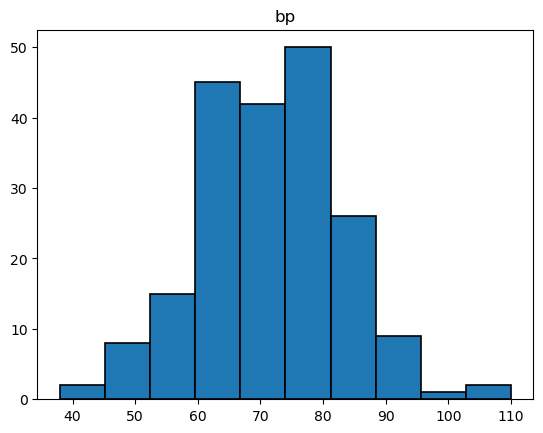

In [5]:
data.hist(column='bp',grid=False,edgecolor='black', linewidth=1.2)

In [6]:
diastolic_blood_pressure = data['bp']

t_statistic, p_value = ttest_1samp(diastolic_blood_pressure, 70,alternative='two-sided')

print("One-sample t-test results:")
print("Null hypothesis: The population mean of diastolic blood pressure is 70")
print("Alternative hypothesis: The population mean of diastolic blood pressure is not 70")
print("Test statistic:", t_statistic)
print("P-value:", p_value)

if(p_value <  0.05):
    print("Reject Null Hypothesis")
else:
    print("Not to Reject NUll Hypothesis")

One-sample t-test results:
Null hypothesis: The population mean of diastolic blood pressure is 70
Alternative hypothesis: The population mean of diastolic blood pressure is not 70
Test statistic: 1.5522391700001443
P-value: 0.12219390499331204
Not to Reject NUll Hypothesis


#### b. Diyabetik ve diyabetik olmayan Pima Kızılderili kadınlar için diyastolik kan basıncının örnek ortalamaları arasındaki farkı bulunuz. Diyastolik kan basıncı ortalamaları arasındaki fark 0.01 düzeyinde istatistiksel olarak anlamlı mı?

In [7]:
diastolic = (data[data['type']=='Yes'])
diastolic.head()

,npreg,glu,bp,skin,bmi,ped,age,type
1,7,195,70,33,25.1,0.163,55,Yes
5,5,97,76,27,35.6,0.378,52,Yes
9,2,128,78,37,43.3,1.224,31,Yes
10,0,137,40,35,43.1,2.288,33,Yes
12,1,189,60,23,30.1,0.398,59,Yes


In [8]:
diastolic['bp'].mean()

74.58823529411765

In [9]:
diastolic_mean = diastolic['bp']-diastolic['bp'].mean()
diastolic_mean.head()

1     -4.588235
5      1.411765
9      3.411765
10   -34.588235
12   -14.588235
Name: bp, dtype: float64

In [10]:
diastolic_mean.shape

(68,)

In [39]:
not_diastolic = (data[data['type']=='No']) 
not_diastolic.head()

,npreg,glu,bp,skin,bmi,ped,age,type
0,5,86,68,28,30.2,0.364,24,No
2,5,77,82,41,35.8,0.156,35,No
3,0,165,76,43,47.9,0.259,26,No
4,0,107,60,25,26.4,0.133,23,No
6,3,83,58,31,34.3,0.336,25,No


In [40]:
not_diastolic['bp'].mean()

69.54545454545455

In [41]:
not_diastolic_mean = not_diastolic['bp']-not_diastolic['bp'].mean()
not_diastolic_mean.head()

0    -1.545455
2    12.454545
3     6.454545
4    -9.545455
6   -11.545455
Name: bp, dtype: float64

In [42]:
not_diastolic_mean.shape

(132,)

In [45]:
t_statistic, p_value = ttest_ind(diastolic_mean,not_diastolic_mean,alternative='two-sided')

print("Two Sample (Independent) t-test results:")
print("Null hypothesis: Same population")
print("Alternative hypothesis: Different population")
print("Test statistic:", t_statistic)
print("P-value:", p_value)

if(p_value <  0.01):
    print("Reject Null Hypothesis")
else:
    print("Not to Reject NUll Hypothesis")

Two Sample (Independent) t-test results:
Null hypothesis: Same population
Alternative hypothesis: Different population
Test statistic: -2.2163698833943503e-15
P-value: 0.9999999999999982
Not to Reject NUll Hypothesis
